In [1]:
import ROOT as rt
# import root_numpy as rtnp
import csv
import re
import sys
import collections

from collections import OrderedDict
import uproot
import pandas as pd

import awkward
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
sys.path.append('/storage/user/christiw/gpu/christiw/llp/delayed_jet_analyzer/lib/')
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot

import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 0

wH = 1
Z_MASS = 91.2


# donotdelete = []
print(sys.version)

Welcome to JupyROOT 6.18/02
3.6.8 (default, Aug  7 2019, 17:28:10) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-39)]


# Load ntuples

In [2]:
fpath_bkg =OrderedDict()
tree_bkg = OrderedDict()
tree_sig = OrderedDict()
fpath_sig =OrderedDict()


start_t = time.time()
data_year = 2018
pdgId = 13
category = 0


if data_year == 2016:
    data_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p12/Data'+str(data_year)+'/v4/v4/normalized/'
elif data_year == 2017:
    data_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p12/Data'+str(data_year)+'/v4/v4/normalized/'
elif data_year == 2018:
    data_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p12/Data'+str(data_year)+'/v4/v4/normalized/'
else:
    print("DATA YEAR IS WRONG")
    raise NameError('DATA YEAR IS WRONG')
mc_path = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p12/MC_RunIIFall18/v4/v4/normalized/'



if category == 0:
    if data_year == 2016:
        fpath_bkg['data'] = data_path + 'Run2_displacedJetMuonNtupler_V1p12_Data2016_Run2016-HighMET-07Aug17_goodLumi.root'
#         fpath_bkg['mc'] = mc_path + 'ggH_HToSSTobbbb_ms55_pl1000_RunIIFall18_1pb_weighted.root'
        lumi = (5.632467289+2.572903489+1.685313225+3.988453305+3.068943620+3.527270568+8.609721915)*1000 #29.085073411
    elif data_year == 2017:
        fpath_bkg['data'] = data_path + 'Run2_displacedJetMuonNtupler_V1p12_Data2017_Run2017-HighMET-17Nov2017_goodLumi.root'
#         fpath_bkg['mc'] = mc_path + 'ggH_HToSSTobbbb_ms55_pl1000_RunIIFall18_1pb_weighted.root'
        lumi = (4.738190514+4.145487893+ 9.295575564+2.603562425) * 1000 #20.782816396
 
    else:
#         fpath_bkg['mc'] = mc_path + 'ggH_HToSSTobbbb_ms55_pl1000_RunIIFall18_1pb_weighted.root'

        fpath_bkg['data'] = data_path + 'Run2_displacedJetMuonNtupler_V1p12_Data2018_17Sept2018_Run2018-HighMET-17Sep2018_goodLumi.root'
        lumi = (13.954129666 + 6.941561868 + 3.227904890 + 31.312400879) * 1000 #55.435997303
#         fpath_bkg['data'] = data_path + 'Run2_displacedJetMuonNtupler_V1p12_Data2018_17Sept2018_Run2018AB-HighMET-17Sep2018_goodLumi.root'
#         lumi = (13.954129666 + 6.941561868 ) * 1000 #55.435997303
#         fpath_bkg['data'] = data_path + 'Run2_displacedJetMuonNtupler_V1p12_Data2018_17Sept2018_Run2018CD-HighMET-17Sep2018_goodLumi.root'
#         lumi = (3.227904890 + 31.312400879) * 1000 #55.435997303

#     fpath_bkg['mc'] = mc_path + 'ggH_HToSSTobbbb_ms55_pl1000_RunIIFall18_1pb_weighted.root'


    fpath_bkg['mcitron_mx12_ctau1'] = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p12/MC_RunIIFall18/v4/v4/normalized/signal_125_12_1m_1pb_weighted.root'
    fpath_bkg['mcitron_mx12_ctau10'] = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p12/MC_RunIIFall18/v4/v4/normalized/signal_125_12_10m_1pb_weighted.root'
    fpath_bkg['mcitron_mx25_ctau1'] = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p12/MC_RunIIFall18/v4/v4/normalized/signal_125_25_1m_1pb_weighted.root'
    fpath_bkg['mcitron_mx25_ctau10'] = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p12/MC_RunIIFall18/v4/v4/normalized/signal_125_25_10m_1pb_weighted.root'
    fpath_bkg['mcitron_mx55_ctau1'] = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p12/MC_RunIIFall18/v4/v4/normalized/signal_125_55_1m_1pb_weighted.root'
    fpath_bkg['mcitron_mx55_ctau10'] = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p12/MC_RunIIFall18/v4/v4/normalized/signal_125_55_10m_1pb_weighted.root'
    fpath_bkg['mc_sixie_mx55_ctau1'] = '/mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p12/MC_RunIIFall18/v4/v4/normalized/ggH_HToSSTobbbb_ms55_pl1000_RunIIFall18_1pb_weighted.root'

NEvents = {}

NEvents_genweight = {}
for k,v in fpath_bkg.items():
    print (k, v)
#     tree[k] = rtnp.root2array(v)
    root_dir = uproot.open(v) 
#     if k[:7] == 'ntuples':
#         tree_bkg[k] = root_dir['ntuples']['llp']
#         NEvents[k] = root_dir['ntuples']['NEvents'][1]
#     else:
    tree_bkg[k] = root_dir['MuonSystem']
    NEvents[k] = root_dir['NEvents'][1]
    NEvents_genweight[k] = root_dir['NEvents_genweight'][1]
#     tree[k] = root_dir['ntuples']
    a = tree_bkg[k]["weight"].array()
    print("NEvents",NEvents[k])
    print("NEvents_genweight",NEvents_genweight[k])


    print ('weights',np.unique(a)*lumi)
    print(np.sum(a))
    print(len(a))
#     print(len(a)/ NEvents[k])
#     print(a.shape)
print(time.time()-start_t)

data /mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p12/Data2018/v4/v4/normalized/Run2_displacedJetMuonNtupler_V1p12_Data2018_17Sept2018_Run2018-HighMET-17Sep2018_goodLumi.root
NEvents 9334354.0
NEvents_genweight 0.0
weights [55435.996]
8634529.0
8634529
mcitron_mx12_ctau1 /mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p12/MC_RunIIFall18/v4/v4/normalized/signal_125_12_1m_1pb_weighted.root
NEvents 131981.0
NEvents_genweight 131964.08
weights [0.08546437 0.2644711  1.3197441  1.3330749  1.3465403 ]
0.9225855
37990
mcitron_mx12_ctau10 /mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p12/MC_RunIIFall18/v4/v4/normalized/signal_125_12_10m_1pb_weighted.root
NEvents 128953.0
NEvents_genweight 128936.18
weights [0.04446167 1.3197441  1.3254386  1.3330749  1.3465403 ]
1.1238116
46275
mcitron_mx25_ctau1 /mnt/hadoop/store/group/phys_exotica/delayedjets/displacedJetMuonAnalyzer/csc/V1p12/MC_RunIIFall18/

# Load trigger

In [3]:
trigger_names_file = '/storage/user/christiw/login-1/christiw/LLP/CMSSW_9_4_4/src/llp_analyzer/data/trigger_names_llp_v1.dat'
trigger_names = []
with open(trigger_names_file) as f:
    reader = csv.reader(f, delimiter=" ")
    for line in reader:
        trigger_names.append(line[2])
# if wH:
#     trigger_paths = [87,135,136] #PFMET120
# #     elif data_year == 2017: trigger_paths = [87,136] #PFMET120
# else:
trigger_paths = [177,362,87,135,136] #PFMET120
trigger_paths += [84,91]
if category == 0:
    trigger_paths = [310]
xsec = {}
xsec['bbbb10m'] = (5.328E-01 + 8.4E-01) *0.324
xsec['bbbb1m'] = (5.328E-01 + 8.4E-01) *0.324
xsec['bbbb0.1m'] = (5.328E-01 + 8.4E-01) *0.324


xsec['WJetsToLNu'] = 61526.7

legend = {}
legend['bbbb10m'] = 'signal c#tau = 10 m'
legend['bbbb1m'] = 'signal c#tau = 1 m'
legend['bbbb0.1m'] = 'signal c#tau = 0.1 m'

legend['SingleElectron'] = 'SingleElectron'
legend['SingleMuon'] = 'SingleMuon'
legend['WJetsToLNu'] = 'WJetsToLNu'

# load bdt

In [4]:
# make predictions for test data

import pickle
model = pickle.load(open( 'bdt_flatten_noEvtSelection.pickle.dat', "rb" ))
# # y_pred = model.predict_proba(x_test)[:, 1]
# # y_pred_train = model.predict_proba(x_train)[:, 1]
# # y_pred_bkg = model.predict_proba(df_bkg.values)[:, 1]
# # predictions = [round(value) for value in y_pred]
# # # evaluate predictions
# # accuracy = accuracy_score(y_test, predictions)
# # print("Accuracy: %.2f%%" % (accuracy * 100.0))


In [5]:
import math
def deltaPhi( phi1,  phi2):
    dphi = phi1-phi2
    while (dphi > math.pi):
        dphi -= 2*math.pi
    while (dphi <= -math.pi):
        dphi += 2*math.pi
    return dphi
def deltaR(eta1, phi1, eta2, phi2):
    dphi = deltaPhi(phi1,phi2)
    deta = eta1 - eta2
    return (dphi*dphi + deta*deta)**0.5

# nCsc with different hit vetoing

In [9]:
%%time

start_t = time.time()
JET_PT_CUT = 10
MUON_PT_CUT = 20


weight = {}
weight_event = {}
lumiSec = {}
evtNum = {}
nCsc = {}
npv = {}
npu = {}
runNum = {}
nCsc_JetMuonVetoCluster0p4_Me1112Veto = {}
gLLP_csc = {}
cscClusterSize = {}
cscClusterTime = {}
nCscClusters = {}
selections_cluster = {}
sel_cluster = {}
sel_jetveto = {}
met_trigger = {}
met = {}
gLLP_beta = {}
jetPt = {}
jetPhi = {}
metPhi = {}
angle ={}
nLeptons = {}
genJetPt = {}
genJetPhi = {}
genMet = {}
genMetPhi = {}
pileupWeight = {}
jetMet_dPhi = {}
jetMet_dPhiMin = {}
jetMet_dPhiMin4 = {}
dphiMet_cluster = {}
npv = {}
nRechitClusters = {}
nJets = {}
nJets_50gev = {}
dPhiMet_cluster = {}
cscRechitClusterTimeDiff = {}
cscRechitCluster_match_gLLP = {}
cscRechitClusterPhi = {}
cscRechitClusterXSpread = {}
cscRechitClusterYSpread = {}
cscRechitClusterNStation = {}
cscRechitClusterEtaPhiSpread = {}
cscRechitClusterX = {}
cscRechitClusterY = {}
cscRechitClusterZ = {}
cscRechitClusterEta = {}
cscRechitClusterMe1112 = {}
cscRechitClusterNStation = {}
bdt_score = {}
ht = {}
jetMet_dPhi30 = {}
jetMet_dPhi40 = {}
jetMet_dPhi50 = {}

legend = {}
legend['data_oot'] = 'Data OOT region'
legend['data_intime'] = 'Data in-time region'
legend['mc_signal'] = 'signal MC in time'
legend['mc_intime'] = 'MC in-time background'
legend['mc_oot'] = 'MC OOT background'
legend['mc_bkg'] = 'QCD 50toInf background'

# keys = ['data','mc_intime_bkg','mc_oot_bkg','mc_signal']
keys = ['data_intime','data_oot','mc_signal','mc_bkg']
keys = ['data_intime','data_oot','mc_signal',]
keys = ['data_intime','data_oot', 'mc_sixie_mx55_ctau1','mcitron_mx12_ctau1', 'mcitron_mx12_ctau10', 'mcitron_mx25_ctau1', 'mcitron_mx25_ctau10', 'mcitron_mx55_ctau1', 'mcitron_mx55_ctau10', ]
print(keys)
 
for k in keys:
    print(k)
    if k == 'mc_bkg':
        T = tree_bkg['QCDHT50toInf']
    elif k[:2] == 'mc':
        T = tree_bkg[k]
    else:
        T = tree_bkg['data']
    if pdgId == 13 and k == 'SingleElectron': continue
    if pdgId == 11 and k == 'SingleMuon': continue
        
########### SELECTION: CLUSTERS ############

    ###### OOT control region #####
    if not k == 'mc_bkg':
        
        sel_rechitcluster = np.abs(T.array('cscRechitClusterMaxChamber')) > 12
        sel_rechitcluster = np.logical_and(sel_rechitcluster, np.abs(T.array('cscRechitClusterEta')) < 2.1)
#     sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitClusterEta') > 0)

        me1112_veto = 0
        sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitClusterNRechitChamberPlus11') <= me1112_veto)
        sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitClusterNRechitChamberPlus12') <= me1112_veto)
        sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitClusterNRechitChamberMinus11') <= me1112_veto)
        sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitClusterNRechitChamberMinus12') <= me1112_veto)
    #     sel_rechitcluster = np.logical_and(sel_rechitcluster, np.logical_and(T.array('cscRechitClusterTime') < 22, T.array('cscRechitClusterTime') > -12.5))
        nRechitClusters[k] = sel_rechitcluster.sum()
        if k[:2] == 'mc' or k == 'data_intime':
            sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitClusterJetVetoPt') < JET_PT_CUT)
            sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitClusterMuonVetoPt') < MUON_PT_CUT)
            sel_rechitcluster = np.logical_and(sel_rechitcluster, np.logical_and(T.array('cscRechitClusterTime') < 12.5, T.array('cscRechitClusterTime') > -5.0))
            if k[:2] == 'mc':
                sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitCluster_match_gLLP'))


        else:
            sel_rechitcluster = np.logical_and(sel_rechitcluster, T.array('cscRechitClusterTime') < -12.5)

        print("sel_rechit",np.count_nonzero(sel_rechitcluster.flatten()))


    
########### SELECTION: EVENTS ############
    hlt = T['HLTDecision'].array()
    # select only triggered events
    sel_ev= np.ones(hlt[:,0].shape, dtype=bool)
    sel_ev= np.zeros(hlt[:,0].shape)
    for tr in trigger_paths:            
        sel_ev  = np.logical_or(sel_ev,hlt[:,tr])
        print("trigger",tr,1.0*np.count_nonzero(hlt[:,tr])/len(hlt[:,tr]))
    print(np.count_nonzero(sel_ev))
    sel_ev = np.logical_and(sel_ev, T.array('category') == category)
    print(np.count_nonzero(sel_ev))

    sel_ev = np.logical_and(sel_ev,sel_rechitcluster.sum() == 1)
    print(np.count_nonzero(sel_ev))

    if category == 0:
        sel_ev = np.logical_and(sel_ev,T.array('met') > 200)
        sel_ev = np.logical_and(sel_ev,T.array('nLeptons') == 0)
        sel_ev = np.logical_and(sel_ev, T.array('nJets') >= 1)
#         sel_ev = np.logical_and(sel_ev, T.array('jetPt')[:,0] > 50)
#     if category == 1:
#         sel_ev = np.logical_and(sel_ev,np.abs(T.array('lepPdgId')).sum() == pdgId)
        if k[:4] == 'data':
            sel_ev = np.logical_and(sel_ev, T.array('Flag_HBHENoiseFilter'))
            sel_ev = np.logical_and(sel_ev, T.array('Flag_HBHEIsoNoiseFilter'))
            sel_ev = np.logical_and(sel_ev, T.array('Flag_BadPFMuonFilter'))
            sel_ev = np.logical_and(sel_ev, T.array('Flag_CSCTightHaloFilter'))
            sel_ev = np.logical_and(sel_ev, T.array('Flag_goodVertices'))
    if category == 2:
        sel_ev = np.logical_and(sel_ev,np.abs(T.array('lepPdgId')).sum() == 2*pdgId)
    print(np.count_nonzero(sel_ev))
    gLLP_csc[k] = T.array('gLLP_csc')
    if k[:2] == 'mc':
        sel_ev = np.logical_and(sel_ev, np.sum(T.array('gLLP_csc'),axis = 1) > 0)
    print(np.count_nonzero(sel_ev))
#         print(np.count_nonzero(sel_ev)/NEvents['mc'])
#     if k == 'mc_intime' or k =='mc_background':
#         sel_ev = np.logical_and(sel_ev, np.sum(T.array('gLLP_csc'),axis = 1) == 0)
#         decay_distance0 = np.sqrt(T.array('gLLP_decay_vertex_x')[:,0]**2 + T.array('gLLP_decay_vertex_y')[:,0]**2 + T.array('gLLP_decay_vertex_z')[:,0]**2)
#         decay_distance1 = np.sqrt(T.array('gLLP_decay_vertex_x')[:,1]**2 + T.array('gLLP_decay_vertex_y')[:,1]**2 + T.array('gLLP_decay_vertex_z')[:,1]**2)
#         cond1 = np.logical_and(decay_distance0 < 200, decay_distance1 < 200)
#         cond2 = np.logical_and(np.abs(T.array('gLLP_decay_vertex_z')[:,0]) > 1200, np.abs(T.array('gLLP_decay_vertex_z')[:,1]) > 1200)
#         sel_ev = np.logical_and(sel_ev, np.logical_or(cond1, cond2))
########### BRANCHES ############

   ##### event variables ##### 
    
    gLLP_beta[k] = T.array('gLLP_beta')[sel_ev]
    jetPt[k] = T.array('jetPt')[sel_ev]
    jetPhi[k] = T.array('jetPhi')[sel_ev]
    nJets[k] = T.array('nJets')[sel_ev]
    nJets_50gev[k] = jetPt[k][jetPt[k]>=50].count()

    ##### bdt variables ####
    cscRechitClusterXSpread[k] = T.array('cscRechitClusterXSpread')[sel_rechitcluster][sel_ev][:,0].flatten()
    print(cscRechitClusterXSpread[k].shape)
    cscRechitClusterYSpread[k] = T.array('cscRechitClusterYSpread')[sel_rechitcluster][sel_ev][:,0].flatten()
    cscRechitClusterNStation[k] = T.array('cscRechitClusterNStation')[sel_rechitcluster][sel_ev][:,0].flatten()
    cscRechitClusterEtaPhiSpread[k] = T.array('cscRechitClusterEtaPhiSpread')[sel_rechitcluster][sel_ev][:,0].flatten()
    cscRechitClusterX[k] = T.array('cscRechitClusterX')[sel_rechitcluster][sel_ev][:,0].flatten()
    cscRechitClusterY[k] = T.array('cscRechitClusterY')[sel_rechitcluster][sel_ev][:,0].flatten()
    cscRechitClusterZ[k] = T.array('cscRechitClusterZ')[sel_rechitcluster][sel_ev][:,0].flatten()
    bdt_var = {'cscRechitClusterXSpread': cscRechitClusterXSpread[k],
     'cscRechitClusterYSpread': cscRechitClusterYSpread[k],
     'cscRechitClusterNStation':cscRechitClusterNStation[k],
     'cscRechitClusterEtaPhiSpread':cscRechitClusterEtaPhiSpread[k],
     'cscRechitClusterX':cscRechitClusterX[k],
     'cscRechitClusterY':cscRechitClusterY[k],
     'cscRechitClusterZ':cscRechitClusterZ[k],
    }
    dataset = pd.DataFrame(bdt_var)
#     print(dataset)
    bdt_score[k] = model.predict_proba(dataset.values)[:, 1]
    print("bdt effiency",np.count_nonzero(bdt_score[k]> 0.9227871)/len(bdt_score[k]))
    print(type(bdt_score[k]))
    print(len(bdt_score[k]) == np.count_nonzero(sel_ev))
#     bdt_sel = bdt_score[k] > 0.26426288 #90% wp
    bdt_sel = bdt_score[k] > -1
    metPhi[k] = T.array('metPhi')[sel_ev][bdt_sel]
#     met_trigger[k] = hlt[:,310][sel_ev]
#     met[k] = T.array('met')[sel_ev]
    ht[k] = np.abs(T.array('jetPt')).sum()[sel_ev][bdt_sel]
    print("ht",ht[k].shape)
    jetMet_dPhiMin4[k] = T.array('jetMet_dPhiMin4')[sel_ev][bdt_sel]
    jetMet_dPhiMin[k] = T.array('jetMet_dPhiMin')[sel_ev][bdt_sel]
    jetMet_dPhi[k] = T.array('jetMet_dPhi')[sel_ev][bdt_sel]
    jetMet_dPhi30[k] = []
    for ev in range(len(jetPt[k])):
        dphi_min_temp = 999
        for i in range(len(jetPt[k][ev])):
            if jetPt[k][ev][i] < 30: continue
            dphi_temp = abs(deltaPhi(metPhi[k][ev],jetPhi[k][ev][i]))
            if dphi_min_temp > dphi_temp: dphi_min_temp = dphi_temp
        jetMet_dPhi30[k].append(dphi_min_temp)
    jetMet_dPhi30[k] = np.array(jetMet_dPhi30[k])
    
    jetMet_dPhi40[k] = []
    for ev in range(len(jetPt[k])):
        dphi_min_temp = 999
        for i in range(len(jetPt[k][ev])):
            if jetPt[k][ev][i] < 40: continue
            dphi_temp = abs(deltaPhi(metPhi[k][ev],jetPhi[k][ev][i]))
            if dphi_min_temp > dphi_temp: dphi_min_temp = dphi_temp
        jetMet_dPhi40[k].append(dphi_min_temp)
    jetMet_dPhi40[k] = np.array(jetMet_dPhi40[k])
    
    jetMet_dPhi50[k] = []
    for ev in range(len(jetPt[k])):
        dphi_min_temp = 999
        for i in range(len(jetPt[k][ev])):
            if jetPt[k][ev][i] < 50: continue
            dphi_temp = abs(deltaPhi(metPhi[k][ev],jetPhi[k][ev][i]))
            if dphi_min_temp > dphi_temp: dphi_min_temp = dphi_temp
        jetMet_dPhi50[k].append(dphi_min_temp)
    jetMet_dPhi50[k] = np.array(jetMet_dPhi50[k])
    
    weight[k] = T.array('weight')[sel_ev][bdt_sel]
    npv[k] = T.array('npv')[sel_ev][bdt_sel]
    rho[k]
    nRechitClusters[k] = nRechitClusters[k][sel_ev][bdt_sel]
    cscRechitClusterPhi[k] = T.array('cscRechitClusterPhi')[sel_rechitcluster][sel_ev][bdt_sel][:,0]
    cscRechitClusterEta[k] = np.abs(T.array('cscRechitClusterEta'))[sel_rechitcluster][sel_ev][bdt_sel][:,0]
    cscRechitClusterNStation[k] = T.array('cscRechitClusterNStation')[sel_rechitcluster][sel_ev][bdt_sel][:,0]

    cscRechitClusterMe1112[k] = (T.array('cscRechitClusterNRechitChamberPlus11') + T.array('cscRechitClusterNRechitChamberPlus12') \
                                 + T.array('cscRechitClusterNRechitChamberMinus11') + T.array('cscRechitClusterNRechitChamberMinus12'))
    cscRechitClusterMe1112[k] = cscRechitClusterMe1112[k][sel_rechitcluster][sel_ev][bdt_sel][:,0]

#     dphiMet_cluster[k] = []
#     for ev in range(len(cscRechitClusterPhi[k])):
#         dphiMet_cluster[k].append(abs(deltaPhi(cscRechitClusterPhi[k][ev],metPhi[k][ev])))
#     dphiMet_cluster[k] = np.array(dphiMet_cluster[k])
    dphiMet_cluster[k] = np.abs(T.array('cscRechitClusterMet_dPhi'))[sel_rechitcluster][sel_ev][bdt_sel][:,0]

    if k[:2] == 'mc':
        pileupWeight[k] = T.array('pileupWeight')[sel_ev][bdt_sel]
    else:
        pileupWeight[k] = np.ones(weight[k].shape, dtype=bool)
    if k[:2] == 'mc':
        weight[k] = weight[k]*lumi
    ##### clusters #####

    if not k == 'mc_bkg':
        cscClusterTime[k] = T.array('cscRechitClusterTime')[sel_rechitcluster][sel_ev][bdt_sel][:,0]
        cscClusterSize[k] =  T.array('cscRechitClusterSize')[sel_rechitcluster][sel_ev][bdt_sel]
        nCsc_JetMuonVetoCluster0p4_Me1112Veto[k] = cscClusterSize[k][:,0]
#         nCscClusters[k] = cscClusterSize[k].count()
#     if k == 'mc_signal':
#         cscRechitCluster_match_gLLP[k] = T.array('cscRechitCluster_match_gLLP')[sel_rechitcluster_notime][sel_ev]


#     print(np.count_nonzero(sel_ev),len(sel_ev))
    print(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k].sum(),len(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]))
    print(k)


['data_intime', 'data_oot', 'mc_sixie_mx55_ctau1', 'mcitron_mx12_ctau1', 'mcitron_mx12_ctau10', 'mcitron_mx25_ctau1', 'mcitron_mx25_ctau10', 'mcitron_mx55_ctau1', 'mcitron_mx55_ctau10']
data_intime
sel_rechit 5426
trigger 310 0.8508298483912672
7346515
6985440
892
742
742
(742,)
bdt effiency 0.07412398921832884
<class 'numpy.ndarray'>
True
ht (742,)
53626 742
data_intime
data_oot
sel_rechit 11465
trigger 310 0.8508298483912672
7346515
6985440
3057
2679
2679
(2679,)
bdt effiency 0.04143337066069429
<class 'numpy.ndarray'>
True
ht (2679,)
178472 2679
data_oot
mc_sixie_mx55_ctau1
sel_rechit 242
trigger 310 0.9498417336255174
3901
3887
225
224
202
(202,)
bdt effiency 0.8663366336633663
<class 'numpy.ndarray'>
True
ht (202,)
84962 202
mc_sixie_mx55_ctau1
mcitron_mx12_ctau1
sel_rechit 1984
trigger 310 0.9872071597788892
37504
37342
1892
1885
1718
(1718,)
bdt effiency 0.8341094295692666
<class 'numpy.ndarray'>
True
ht (1718,)
745799 1718
mcitron_mx12_ctau1
mcitron_mx12_ctau10
sel_rechit 496
t

## Distribution for event level variables

202 202
mc_sixie_mx55_ctau1 0.6165218830108643
37.0
1718 1718
mcitron_mx12_ctau1 0.6227731168270111
313.0
441 441
mcitron_mx12_ctau10 0.7355058789253235
111.0
1764 1764
mcitron_mx25_ctau1 0.43346107006073
259.0
710 710
mcitron_mx25_ctau10 0.6631367087364197
159.0
729 729
mcitron_mx55_ctau1 0.5449251651763916
68.0
1230 1230
mcitron_mx55_ctau10 0.7625498950481415
198.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: mc_sixie_mx55_ctau1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: mcitron_mx12_ctau1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: mcitron_mx12_ctau10 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: mcitron_mx25_ctau1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: mcitron_mx25_ctau10 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: mcitron_mx55_ctau1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: mcitron_mx55_ctau10 (Potential memory leak).


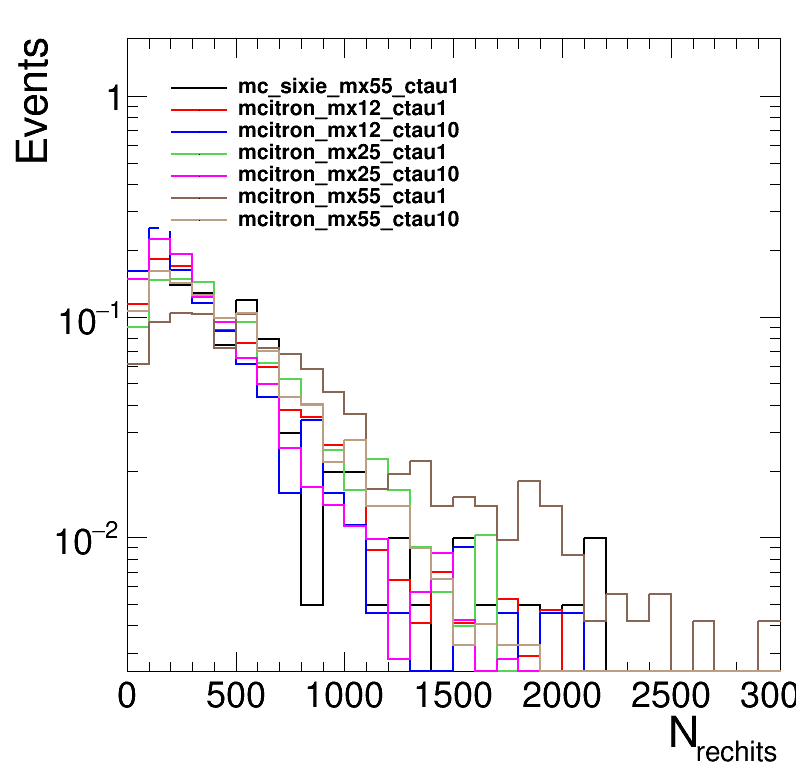

In [22]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot

c = rt.TCanvas('c','c', 800, 800)
# Plotting ncsc
start_t = time.time()

h = {}
rt.gStyle.SetOptFit(1011)
leg = rt.TLegend(0.2,0.7,0.6,0.9)

leg.SetTextSize(0.03)
leg.SetBorderSize(0)

leg.SetEntrySeparation(0.01)
# keys = ['data_intime','mc_signal', 'data_oot']
max_value = 0
keys = ['data_intime','data_oot', 'mc_sixie_mx55_ctau1','mcitron_mx12_ctau1', 'mcitron_mx12_ctau10', 'mcitron_mx25_ctau1', 'mcitron_mx25_ctau10', 'mcitron_mx55_ctau1', 'mcitron_mx55_ctau10', ]

keys = ['mc_sixie_mx55_ctau1','mcitron_mx12_ctau1', 'mcitron_mx12_ctau10', 'mcitron_mx25_ctau1', 'mcitron_mx25_ctau10', 'mcitron_mx55_ctau1', 'mcitron_mx55_ctau10', ]

for i,k in enumerate(keys):
    if k == 'data_intime':
        cond = nCsc_JetMuonVetoCluster0p4_Me1112Veto[k] < 70
    else:
        cond = np.ones(weight[k].shape, dtype=bool)
        
#     var = jetPt
#     h[k] = create_TH1D( var[k][cond], axis_title=['Leading jet p_{T} [GeV]', 'Events'], name=k, binning=[50,0,500],weights = weight[k][cond]*pileupWeight[k][cond])
#     var = met
#     h[k] = create_TH1D( var[k][cond], axis_title=['met [GeV]', 'Events'], name=k, binning=[50,200,500],weights = weight[k][cond]*pileupWeight[k][cond])
#     var = jetMet_dPhi
#     h[k] = create_TH1D( np.abs(var[k][cond]), axis_title=['\Delta\Phi (jet1,met)', 'Events'], name=k, binning=[50,0,3.2],weights = weight[k][cond]*pileupWeight[k][cond])
#     var = jetMet_dPhiMin
#     h[k] = create_TH1D( np.abs(var[k][cond]), axis_title=['min \Delta\Phi (jet,met)', 'Events'], name=k, binning=[50,0,3.2],weights = weight[k][cond]*pileupWeight[k][cond])
#     var = jetMet_dPhiMin4
#     h[k] = create_TH1D( np.abs(var[k][cond]), axis_title=['min \Delta\Phi (jet,met)', 'Events'], name=k, binning=[50,0,3.2],weights = weight[k][cond]*pileupWeight[k][cond])
#     var = npv
#     h[k] = create_TH1D( np.abs(var[k]), axis_title=['npv', 'Events'], name=k, binning=[100,0,100],weights = weight[k])
#     if not k == 'mc_signal': continue
#     h[k] = create_TH1D( cscClusterTime[k][cond], axis_title=['N_{clusters}', 'Events'], name=k, binning=[100,-50,50],weights = weight[k][cond]*pileupWeight[k][cond])
#     h[k] = create_TH1D( bdt_score[k][cond], axis_title=['N_{clusters}', 'Events'], name=k, binning=[100,0,1],weights = weight[k][cond]*pileupWeight[k][cond])
#     h[k] = create_TH1D( cscClusterTime[k], axis_title=['N_{clusters}', 'Events'], name=k, binning=[100,-50,50],weights = weight[k][cond]*pileupWeight[k][cond])
#     print(np.count_nonzero(cscClusterTime[k]<12.5)/len(cscClusterTime[k]))
#     print(max(cscClusterTime[k]),min(cscClusterTime[k]))
#     cond = nCsc_JetMuonVetoCluster0p4_Me1112Veto[k] > 500
#     h[k] = create_TH1D( np.abs(nRechitClusters[k][cond]), axis_title=['N_{clusters}', 'Events'], name=k, binning=[5,0,5],weights = weight[k][cond]*pileupWeight[k][cond])
#     cond = np.logical_and(cond,ht[k]>=800)
#     h[k] = create_TH1D( jetMet_dPhiMin4[k][cond], axis_title=['min_{4 jet} \Delta\Phi', 'Events'], name=k, binning=[50,0,3.14])
    h[k] = create_TH1D( np.abs(jetMet_dPhi30[k][cond]), axis_title=['min_{all\hspace jet > 30 GeV} \Delta\Phi(jet,MET)', 'Events'], name=k, binning=[25,0,3.14],weights = weight[k][cond]*pileupWeight[k][cond])
    
    h[k] = create_TH1D( nCsc_JetMuonVetoCluster0p4_Me1112Veto[k][cond], axis_title=['N_{rechits}', 'Events'], name=k, binning=[30,0,3000])

    
    print(len(jetMet_dPhiMin4[k][cond]), len(jetMet_dPhi30[k][cond]))
#     if k == 'mc_signal': print(jetMet_dPhi30[k][cond])
#     h[k] = create_TH1D( dphiMet_cluster[k][cond], axis_title=['\Delta\Phi (cluster,met)', 'Events'], name=k, binning=[50,0,3.14])

    print(k,np.percentile(jetMet_dPhi30[k][cond],10))
#     h[k] = create_TH1D( np.abs(cscRechitClusterNStation[k][cond]), axis_title=['N_{stations}', 'Events'], name=k, binning=[5,0,5],weights = weight[k][cond]*pileupWeight[k][cond])
#     h[k] = create_TH1D( np.abs(cscRechitClusterEta[k][cond]), axis_title=['abs(cluster #eta)', 'Events'], name=k, binning=[25,0.5,2.5],weights = weight[k][cond]*pileupWeight[k][cond])
#     h[k] = create_TH1D( cscRechitClusterMe1112[k][cond], axis_title=['N_{ME11/12 rechits}', 'Events'], name=k, binning=[10,0,20],weights = weight[k][cond]*pileupWeight[k][cond])
#     w = weight[k][cond]*pileupWeight[k][cond]
#     h[k].SetBinContent(20,h[k].GetBinContent(20)+np.sum(w[cscRechitClusterMe1112[k][cond]>20]))


#     var = nJets
#     h[k] = create_TH1D( np.abs(var[k][cond]), axis_title=['Number of Jets', 'Events'], name=k, binning=[10,0,10],weights = weight[k][cond]*pileupWeight[k][cond])
#     var = nJets_50gev
#     h[k] = create_TH1D( np.abs(var[k][cond]), axis_title=['Number of Jets', 'Events'], name=k, binning=[10,0,10],weights = weight[k][cond]*pileupWeight[k][cond])

    
    h[k].SetLineColor(std_color_list[i])
    leg.AddEntry(h[k], k)
    max_value = max(h[k].GetMaximum(),max_value)
    h[k].SetMaximum(max_value*10)
#     h[k].SetMinimum(1)

    h[k].DrawNormalized('hist same')
    print(h[k].GetBinContent(2))
# c = make_ratio_plot([h[mc],h[data]], fit = True, logy=True, in_tags = ["MC","Data"], ratio_bounds = [0,3])
# c.SetRightMargin(0)
c.SetLogy()
leg.Draw()

c.Draw()
# print(time.time()-start_t)

# Roc curve for event level variables

In [ ]:
#ROC curve
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.6,0.75,0.90,0.90)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)

leg.SetEntrySeparation(0.01)
gr = {}

qcd_key = 'data_intime'
sig_k = 'mc_signal'
var = jetPt
name = 'jetPt'

var = met
name = 'met'
eff = {}

var = [jetMet_dPhi,jetMet_dPhiMin, jetMet_dPhiMin4, dphiMet_cluster]
name = ['\Delta\Phi(jet1,MET)','min_{all\hspace jet} \Delta\Phi(jet,MET)','min_{4 jet} \Delta\Phi(jet,MET)','\Delta\Phi(cluster,MET)']
compare_greater = [True, True, True, False]
thre = np.arange(0.0,3.15,0.05)

var = [jetMet_dPhi,jetMet_dPhiMin, jetMet_dPhiMin4, jetMet_dPhi30, jetMet_dPhi40, jetMet_dPhi50]
name = ['\Delta\Phi(jet1,MET)','min_{all\hspace jet} \Delta\Phi(jet,MET)','min_{4 jet} \Delta\Phi(jet,MET)',
        'min_{all\hspace jet > 30 GeV} \Delta\Phi(jet,MET)', 'min_{all\hspace jet > 40 GeV} \Delta\Phi(jet,MET)', 'min_{all\hspace jet > 50 GeV} \Delta\Phi(jet,MET)']
compare_greater = [True, True, True, True, True, True]
thre = np.arange(0.0,3.15,0.05)

# var = [jetMet_dPhiMin4, dphiMet_cluster]
# name = ['min_{4 jet} \Delta\Phi(jet,MET)','\Delta\Phi(cluster,MET)']
# compare_greater = [ True, False]
# thre = np.arange(0.0,3.15,0.05)

# var = [cscRechitClusterEta]
# name = ['abs(cluster #eta)']
# thre = np.arange(0.5,3.0,0.05)


# var = [cscRechitClusterNStation]
# name = ['N_{stations}']
# thre = [0,1,2,3,4]


# var = [cscRechitClusterMe1112]
# name = ['N_{ME11/12 rechits}']
# var = [cscRechitClusterTimeDiff]
# name = ['cscRechitClusterTimeDiff']

for i in range(len(name)):
    for k in [qcd_key,sig_k]:
        if k == 'data_intime':
            cond = np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k] < 200,nCsc_JetMuonVetoCluster0p4_Me1112Veto[k]>0)
        else:
            cond = np.ones(weight[k].shape, dtype=bool)
        v = np.abs(var[i][k][cond])
        w = weight[k][cond]
        eff[k] = []
        for th in thre:
#             if k == 'mc_signal':
#                 eff[k].append(1.0*np.sum(w[v<th])/np.sum(w))
#             else:
#                 eff[k].append(1.0*np.sum(w[v>=th])/np.sum(w))
            if compare_greater[i]:
                eff[k].append(1.0*np.sum(w[v>th])/np.sum(w))
            else:
                eff[k].append(1.0*np.sum(w[v<th])/np.sum(w))

                #             if i == 1:
#                 print(th,eff[k][-1])
        eff[k] = np.array(eff[k])
    #     Plotting ROC curve
    thre = thre[np.logical_not(eff[qcd_key] == 0)]
    eff[sig_k] = eff[sig_k][np.logical_not(eff[qcd_key] == 0)]
    eff[qcd_key] = eff[qcd_key][np.logical_not(eff[qcd_key] == 0)]
#     gr[name[i]] = create_TGraph(np.reciprocal(eff[qcd_key]),eff[sig_k],axis_title = ['background rejection','signal contamination'])
    min_index = np.argmin(np.abs(eff[sig_k]-0.95))
    print("wp 0.95: bkg rejection, signal eff, threshold",np.reciprocal(eff[qcd_key][min_index]),eff[sig_k][min_index], thre[min_index])
    min_index = np.argmin(np.abs(eff[sig_k]-0.90))
    print("wp 0.90",np.reciprocal(eff[qcd_key][min_index]),eff[sig_k][min_index], thre[min_index])
    gr[name[i]] = create_TGraph(np.reciprocal(eff[qcd_key]),eff[sig_k],axis_title = ['background rejection','#epsilon_{sig}'])
    #     gr[name[i]].SetLineColor(std_color_list[int(i/2)])
    #     gr[name[i]].SetLineStyle(std_color_list[i%2])
    gr[name[i]].SetLineColor(std_color_list[i])
    gr[name[i]].SetLineWidth(2)


    #     gr[name[i]].GetYaxis().SetRangeUser(0,0.3)
    gr[name[i]].GetYaxis().SetRangeUser(0.0, 1.0)
    gr[name[i]].GetXaxis().SetLimits(0.9, 50.0)
#     gr[name[i]].GetXaxis().SetLimit(1.0)

    #         gr[name[i]].GetYaxis().SetRangeUser(1.0/np.max(eff['QCD']), 10000)


    leg.AddEntry(gr[name[i]],name[i])

    gr[name[i]].Draw('ac' if i == 0 else 'c')
leg.Draw()
c.SetLogx()
c.Draw()
# c.SaveAs('../plots/timing_studies/compare_timing_definition_ROC.png')




In [ ]:
np.arange(3.0,7.0,0.1)

# Data plot

In [ ]:
import importlib
importlib.reload(sys.modules['histo_utilities'])
from histo_utilities import create_TH1D, create_TH2D, std_color_list, create_TGraph, make_ratio_plot
leg = rt.TLegend(0.5,0.80,0.90,0.90)

leg.SetTextSize(0.03)
leg.SetBorderSize(0)

leg.SetEntrySeparation(0.01)
c = rt.TCanvas('c','c', 800, 800)
# Plotting ncsc
start_t = time.time()

legend = {}
legend['data_oot'] = 'Data OOT region'
legend['data_intime'] = 'Data in-time region'
legend['mc_signal'] = 'signal MC in time'
legend['mc_intime'] = 'MC in-time background'
legend['mc_oot'] = 'MC OOT background'
legend['mc_bkg'] = 'QCD 50toInf background'




keys = ['data_intime','data_oot','mc_signal',]
# keys = ['data_intime','mc_signal','']


h = {}
rt.gStyle.SetOptFit(1011)
# for i,k in enumerate(tree_bkg.keys()):
br = 1
for i,k in enumerate(keys):

    if k == 'data_intime':
        cond = nCsc_JetMuonVetoCluster0p4_Me1112Veto[k] < 200
        
    else:
        cond = np.ones(weight[k].shape, dtype=bool)
#     cond = np.logical_and(cond, jetMet_dPhiMin4[k]>0.25)
    if k == 'mc_signal':
        br = 1
    else: br = 1
#     if k == 'mc_background':br = 1
    bins = [50,0,1000]
    metcut = 200
    h[k] = create_TH1D( nCsc_JetMuonVetoCluster0p4_Me1112Veto[k][cond], axis_title=['N_{rechits}', 'Events'], name=k, binning=bins,weights = br*weight[k][cond])
    h[k].SetLineColor(std_color_list[i])
    print("weight",weight[k][0])
    leg.AddEntry(h[k], legend[k]+" (scaled)" if k == 'data_oot' else legend[k])
#     if k == 'mc_signal':
#         for i in range(h[k].GetNbinsX()):
#             s = 0.015*h[k].GetBinContent(i+1)
#             b = h['data_oot'].GetBinContent(i+1)
#             if s+b == 0:continue
#             sig = s/(s+b)**0.5
#             print(i,h[k].GetBinCenter(i+1),sig,s,b)
#             if sig < 1./100:
#                 print(i,sig)
#                 continue
#     h[k].SetMinimum(1)

#     r = h[k].Fit('expo', 'LRSQ+', '', 50,400)
#     print(r.Get())
#     print(r.Prob())
#     h[k].GetFunction("expo").SetLineColor(std_color_list[2])
#     h[k].GetFunction("expo").SetLineWidth(2)
    h[k].GetXaxis().SetLabelSize(0.04)
    h[k].SetMinimum(0.1)
    h[k].SetMaximum(10E6/2)
#     h[k+'met'].GetXaxis().SetLabelSize(0.02)
    if k == 'data_oot':
        scale = 1.0*h['data_intime'].GetBinContent(4)/h['data_oot'].GetBinContent(4)
#         for i in range(10):
#             print(1.0*h['data_intime'].GetBinContent(i+1)/h['data_oot'].GetBinContent(i+1))
        h[k].Scale(scale)
    if k[:4] == 'data':
        h[k].Draw('same E1')
    else:
        h[k].Draw("same hist")
#     h[k+'met'].DrawNormalized('same')
    

# c = make_ratio_plot([h['mc'],h['data']], fit = False, logy=True, in_tags = ["MC","Data"], ratio_bounds = [0,3])
c.SetRightMargin(0)
c.SetLogy()
leg.Draw()

c.Draw()
# print(time.time()-start_t)

## significance

In [ ]:
start_t = time.time()
#ROC curve
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.35,0.80,0.85,0.92)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)

leg.SetEntrySeparation(0.01)

var = [nCsc_JetMuonVetoCluster0p4_Me1112Veto,]
name = ['nCsc_JetMuonVetoCluster0p4_Me1112Veto',]
legend = [ 'jet & muon veto + ME11/12 veto',]

bkg_k = 'data_oot'
sig_k = 'mc_signal'
br = 0.01

threshold = list(range(300))
threshold = np.array(list(range(2000)))
# print(threshold)
for i in range(len(var)):
    event_count = {}
    
    for k in ['data_oot','mc_signal']:
        event_count[k] = []
        for th in threshold:
            event_count[k].append(np.sum(weight[k][var[i][k]>th]))
        event_count[k] = np.array(event_count[k])
        if k == sig_k:
            event_count[k] = event_count[k]*br
    sig = event_count[sig_k]/np.sqrt(event_count[sig_k]+event_count[bkg_k])
    cond = event_count[sig_k]>0
    sig = sig[cond]
    ncsc = threshold[cond]
#     gr['bbbb'] = create_TGraph(eff_bkg,eff_sig,axis_title = ['#epsilon_{bkg}','#epsilon_{signal}'])
    h[sig_k+str(i)] = create_TGraph(ncsc, sig,  axis_title=['N_{rechits}', 'Significnace'])
#     h[sig_k+str(i)] = create_TGraph(ncsc, event_count[sig_k],  axis_title=['N_{rechits}', 'Event Yield'])

    h[sig_k+str(i)].SetLineWidth(2)
    h[sig_k+str(i)].SetMarkerColor(std_color_list[i])
    h[sig_k+str(i)].SetLineColor(std_color_list[i])
    h[sig_k+str(i)].GetXaxis().SetRangeUser(0, 3000)
    h[sig_k+str(i)].GetXaxis().SetLabelSize(0.04)

#     h[sig_k+str(i)].GetYaxis().SetRangeUser(0, 3)


    leg.AddEntry(h[sig_k+str(i)],sig_k+" "+legend[i])
    h[sig_k+str(i)].Draw('ac' if i == 0 else 'c')

#     h[sig_k+str(i)].Draw('ac' if i==0 else 'c')
#     gr['bbbb'].Draw('')




# c.SetLogy()
c.Draw()
# c.SaveAs('../plots/timing_studies/compare_timing_definition_ROC.png')

print(time.time()-start_t)


# 2D histogram

In [ ]:
# Plotting ncsc
start_t = time.time()
c = rt.TCanvas('c','c', 1000, 800)
h = {}
# leg = rt.TLegend(0.50,0.75,0.97,0.93)
leg = rt.TLegend(0.58,0.70,0.94,0.85)
leg.SetTextSize(0.022)
# leg.SetTextFont(42)
leg.SetEntrySeparation(0.01)

i = 0
k = 'data_intime'
if k == 'data_intime':
    cond = np.logical_and(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k] < 200,jetPt[k].count()>0)
else:
    cond = jetPt[k].count()>0
# h[k] = create_TH2D(np.column_stack((angle[k][cond],jetPt[k][cond][:,0])), axis_title = ['\Delta\phi (jet,met)','jet p_{T}[GeV]','Events'], binning=[80,-3.14,3.14,100,0,2000])
h[k] = create_TH2D(np.column_stack(( jetMet_dPhiMin4[k][cond], dphiMet_cluster[k][cond])), axis_title = ['\Delta\phi (jet,met)','\Delta\phi (cluster,met)','Events'], binning=[50,0,3.14,50,0,3.14])
h[k] = create_TH2D(np.column_stack(( jetMet_dPhiMin4[k][cond], jetPt[k][cond][:,0])), axis_title = ['\Delta\phi (jet,met)','jetPt[GeV]','Events'], binning=[50,0,3.14,50,0,1000])



# h[k] = create_TH2D(np.column_stack((gen_angle[k],genJetPt[k][:,0])), axis_title = ['\Delta\phi (jet,met)','jet p_{T}[GeV]','Events'], binning=[80,-3.14,3.14,100,0,2000])
# h[k] = create_TH2D(np.column_stack((nCscClusters[k][cond],nCsc_JetMuonVetoCluster0p4_Me1112Veto[k][cond])), axis_title = ['N_{clusters}','N_{rechits}','Events'], binning=[3,0,3,100,0,100])
# print(np.count_nonzero(nCscClusters[k][cond]>1))
# print(nCsc_JetMuonVetoCluster0p4_Me1112Veto[k][nCscClusters[k]==1])
# h[k] = create_TH2D(np.column_stack((met[k],nCsc_JetMuonVetoCluster0p4_Me1112Veto[k])), axis_title = ['met[GeV]','N_{rechits}','Events'], binning=[50,0,500,50,0,3000])
# h[k] = create_TH2D(np.column_stack((met[k],jetPt[k].count())), axis_title = ['met[GeV]','N_{jets}','Events'], binning=[50,0,500,10,0,10])
# h[k] = h[k].ProfileY()
h[k].GetXaxis().SetLabelSize(0.04)




h[k].SetLineColor(std_color_list[i])
# leg.AddEntry(h[k], k)
#     h[k].SetMaximum(10E5)
#     h[k].SetMinimum(1)
h[k].Draw('colz')
c.SetRightMargin(0.2)



# if setlog: 
c.SetLogz()
c.Draw()
print(time.time()-start_t)

# third

# ROC Curve

# 4th

# nCsc histogram

# event yield vs. ncsc

# significance